In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [37]:
df = pd.read_csv("data/c0044_track.csv")
df

,t,Ax,Ay,Bx,By
0,0.000000,0.133816,-0.050257,0.159732,-0.078741
1,0.033367,0.133805,-0.050251,0.159719,-0.078729
2,0.066733,0.133822,-0.050271,0.159741,-0.078726
3,0.100100,0.133853,-0.050242,0.159764,-0.078736
4,0.133467,0.133841,-0.050262,0.159761,-0.078718
...,...,...,...,...,...
232,7.741067,NaN,NaN,-0.152164,0.020968
233,7.774433,NaN,NaN,-0.154442,0.017868
234,7.807800,NaN,NaN,-0.156978,0.014840
235,7.841167,NaN,NaN,-0.159459,0.011779


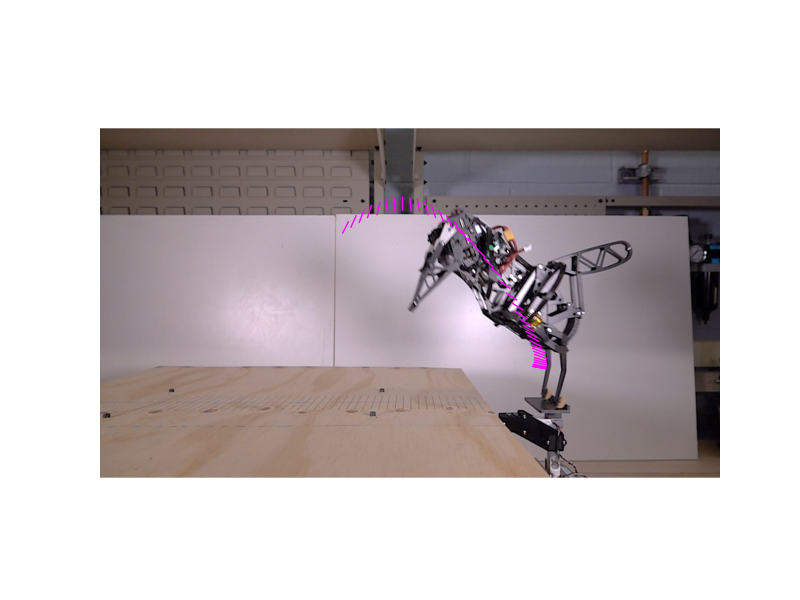

In [86]:

# uncalibrate
dx = 1359.4 - 1294.55658
dy = 736.950000 - 665.805977
scale = (dx**2+dy**2)**0.5 / 0.0385
# scale


# Load the background image
img = plt.imread('liftoff_adj.jpg')

# Create a new figure
plt.figure(figsize=(8,6))

# Display the image
plt.imshow(img, aspect='auto', extent=[-img.shape[1] / (2 * scale), img.shape[1] / (2 * scale), -img.shape[0] / (2 * scale), img.shape[0] / (2 * scale)]) 


pointfreq=5
plt.axis('off')  # Hide the axes

angles = np.degrees(np.arctan2(df['By'] - df['Ay'], df['Bx'] - df['Ax']))
angles = angles - angles[0] + 80

for i in range(0, len(df), 5):
    plt.plot(df['Bx'][i], df['By'][i], marker=(2, 0, angles[i]), markersize=10, color='magenta', linestyle='None')
# for i in range(len(df)):
#     plt.plot(df['Bx'][i], df['By'][i], marker='s', markersize=5, color='magenta', 
#              transform=plt.gca().transData + plt.gca().Affine2D().rotate_deg(i * 5))  # Rotate by 5 degrees for each point
    



plt.axis('equal')  # Equal scaling for both axes
plt.show()

plt.savefig('track_plot.png', format='png', bbox_inches='tight', dpi=300, transparent=True, pad_inches=0)


In [65]:
for i in range(0, len(df), 10):
    print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230


In [53]:
max_By = df['By'].max()
min_By = df['By'].min()
print(f"Max of By: {max_By}")
print(f"Min of By: {min_By}")
print(f"Diff of By: {max_By - min_By}")


Max of By: 0.1238077
Min of By: -0.07874418
Diff of By: 0.20255188000000002
